# **TTI109 - Estatística**
# **Aula 06 - Estatística Descritiva 05**

Nessa aula vamos aprender a calcular:

* Medidas de posição (quartis e separatrizes em geral);
* Amplitude interquartil;
* *Outliers* de uma distribuição;
* Diagramas *boxplot*;
* Escores-z.

## **Análise dos quartis de uma série de dados**

Para o conjunto de dados a seguir:

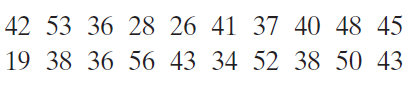

*   Determine os quartis;

In [1]:
import pandas as pd

# Conjunto de dados
dados = pd.Series([42, 53, 36, 28, 26, 41, 37, 40, 48, 45,
                   19, 38, 36, 56, 43, 34, 52, 38, 50, 43])

In [2]:
# Determinação dos três quartis
quartis = dados.quantile([0.25, 0.5, 0.75], interpolation='linear')
print('Quartis em um Panda Series:')
display(quartis)

Quartis em um Panda Series:


0.25    36.00
0.50    40.50
0.75    45.75
dtype: float64

In [3]:
# Mostrando os quartis ao usuário
print('Desmembrando os quartis:')
lquartis = list(quartis)
for i in range(len(lquartis)):
  print(f'Q{str(i+1)} = {lquartis[i]}')

Desmembrando os quartis:
Q1 = 36.0
Q2 = 40.5
Q3 = 45.75


*   Calcule a amplitude interquartil;

In [4]:
# Calculando a amplitude interquartil
interquartil = quartis[0.75] - quartis[0.25]
print(f'Amplitude interquartil: {interquartil}')

Amplitude interquartil: 9.75


*   Identifique quaisquer outliers.

In [5]:
# Limites para detecção de outliers
lim_min = quartis[0.25] - 1.5*interquartil
lim_max = quartis[0.75] + 1.5*interquartil
print('Limites de detecção para outliers:')
print(f'Inferior = {lim_min}')
print(f'Superior = {lim_max}')

Limites de detecção para outliers:
Inferior = 21.375
Superior = 60.375


In [6]:
# Procurando por outliers
out_inf = dados.loc[dados <= lim_min]
print('Outlier inferior:')
display(out_inf)

out_sup = dados.loc[dados >= lim_max]
print('\nOutlier superior:')
display(out_sup)

Outlier inferior:


10    19
dtype: int64


Outlier superior:


Series([], dtype: int64)

## **Customizando as separatrizes**

É possível customizar as separatrizes usando o método `quantile`. Basta passar uma lista com os percentis desejados.

In [7]:
# Determinação dos percentis customizados
percentis = dados.quantile([0.1, 0.35, 0.68, 0.95], interpolation='linear')
print('Percentis em um Panda Series:')
display(percentis)

Percentis em um Panda Series:


0.10    27.80
0.35    37.65
0.68    43.00
0.95    53.15
dtype: float64

## **Análise exploratória inicial**

O `Pandas` permite uma análise exploratória simplificada por meio do método `describe`.

In [8]:
# Análise exploratória
dados.describe()

count    20.000000
mean     40.250000
std       9.306902
min      19.000000
25%      36.000000
50%      40.500000
75%      45.750000
max      56.000000
dtype: float64

## **Análise dos quartis de um painel de dados**

O estudo realizado nas séries pode ser facilmente estendido para o caso de painéis de dados.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Importação do conjunto de dados
gorjetas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/_grad/[2023 - TTI109] - Estatistica/Aula 06 - Estatística Descritiva 05/tips.csv')
display(gorjetas.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
gorjetas.head(-5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2


In [15]:
# Determinação dos quartis
quartis = gorjetas.quantile([0.25, 0.5, 0.75], axis=0,
                            interpolation='linear', numeric_only=True)
print('Tabela com os quartis para cada coluna numérica:')
display(quartis)

Tabela com os quartis para cada coluna numérica:


,total_bill,tip,size
0.25,13.3475,2.0000,2.0
0.50,17.7950,2.9000,2.0
0.75,24.1275,3.5625,3.0


In [16]:
# Percentis customizados
percentis = gorjetas.quantile([0.1, 0.3, 0.8], axis=0,
                              interpolation='linear', numeric_only=True)
print('Tabela com percentis customizados:')
display(percentis)

Tabela com percentis customizados:


,total_bill,tip,size
0.1,10.340,1.5,2.0
0.3,14.249,2.0,2.0
0.8,26.098,4.0,3.0


In [17]:
# Análise exploratória inicial
print('Análise exploraória:')
gorjetas.describe()

Análise exploraória:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## **Boxplot - Série de dados**

De volta ao conjunto de dados tratado no início desse notebook:

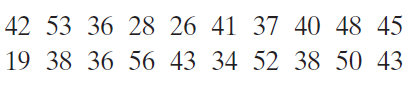

Construa um diagrama boxplot representativo da distribuição.

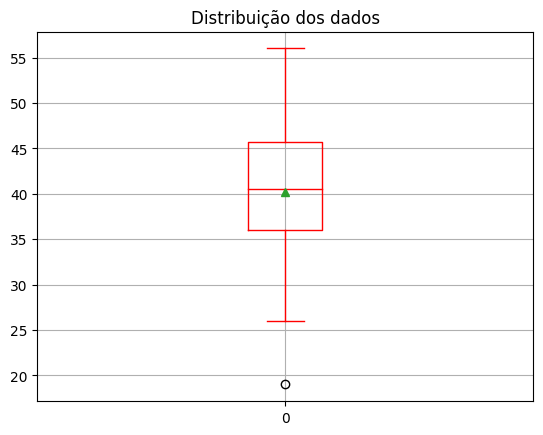

In [18]:
# É preciso transformar o Pandas Series em um Pandas DataFrame
# Não existe o método boxplot para objetos Pandas Series
df = pd.DataFrame(dados)
df.boxplot(color='red', vert=True, whis=1.5, showmeans=True)
plt.title('Distribuição dos dados')
plt.show()

## **Boxplot - Painéis de dados**

De volta ao conjunto de dados `tips.csv`. O uso do método `boxplot` tem seu total potencial realizado quando os dados estão no formato `Pandas DataFrame`. Vamos checar a distribuição do valor das comandas por dia de funcionamento do restaurante.

In [19]:
# Relembrando o formato dos dados
display(gorjetas.head())

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


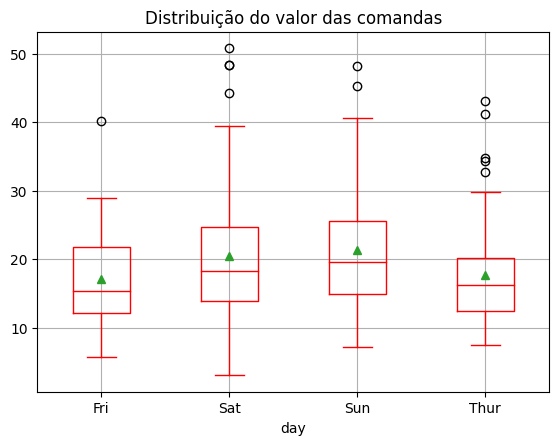

In [20]:
# Diagrama boxplot
gorjetas.boxplot(by='day', column=['total_bill'], color='red', showmeans=True)
plt.title('Distribuição do valor das comandas')
plt.suptitle('')
plt.show()

Agora, vamos examinar a distribuição das gorjetas por dia de funcionamento do restaurante.

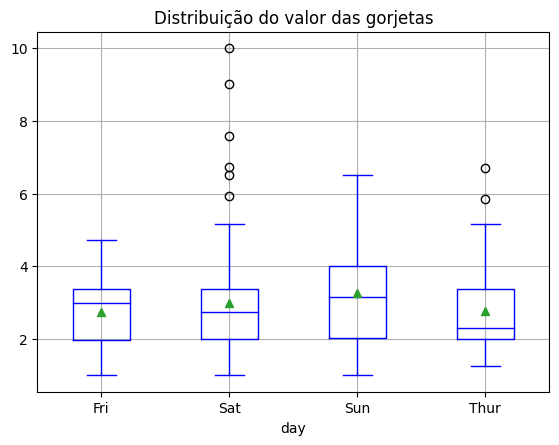

In [21]:
# Diagrama boxplot
gorjetas.boxplot(by='day', column=['tip'], color='blue', showmeans=True)
plt.title('Distribuição do valor das gorjetas')
plt.suptitle('')
plt.show()

Qual a distribuição das gorjetas agrupada por período de funcionamento?

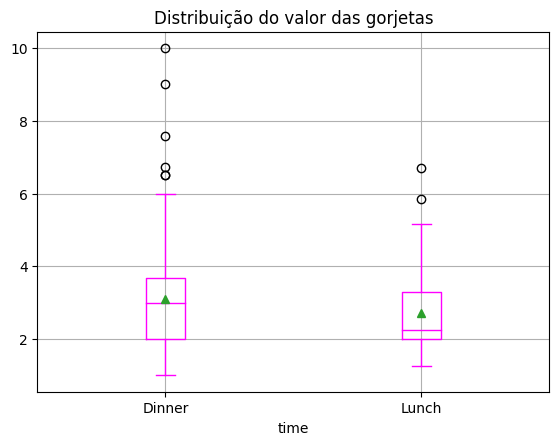

In [22]:
gorjetas.boxplot(by='time', column=['tip'], color='magenta', showmeans=True)
plt.title('Distribuição do valor das gorjetas')
plt.suptitle('')
plt.show()

Também é possível agrupar a distribuição de gorjetas usando dois ou mais fatores. Aqui, vamos agrupar por dia de funcionamento e gênero do cliente.

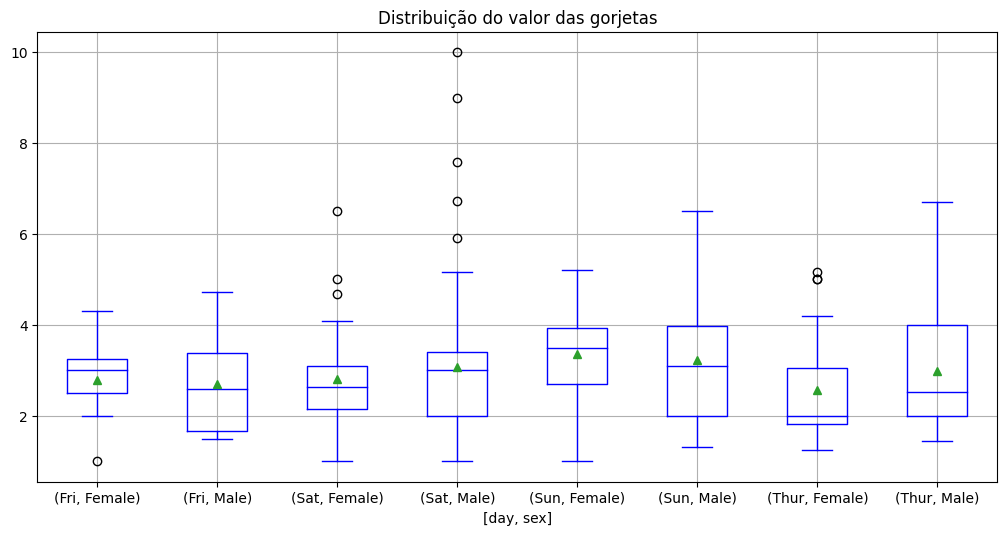

In [23]:
gorjetas.boxplot(by=['day', 'sex'], column=['tip'],
                 color='blue', figsize=(12,6), showmeans=True)
plt.title('Distribuição do valor das gorjetas')
plt.suptitle('')
plt.show()

## **Calculando escores-z**


In [24]:
import scipy.stats as stats

# Criando o conjunto de dados
dados = pd.DataFrame({'Nome': ['Nik', 'Kate', 'Joe', 'Mitch', 'Alana'],
                      'Idade': [32, 30, 67, 34, 20],
                      'Renda': [80000, 90000, 45000, 23000, 12000]})
print('Tabela original:')
display(dados)

Tabela original:


,Nome,Idade,Renda
0,Nik,32,80000
1,Kate,30,90000
2,Joe,67,45000
3,Mitch,34,23000
4,Alana,20,12000


In [25]:
# Calculando os escores-z das colunas numéricas
tabela_z = dados.select_dtypes(include='number').apply(stats.zscore)
print('Tabela com colunas substituídas pelos escores-z:')
display(tabela_z)

Tabela com colunas substituídas pelos escores-z:


,Idade,Renda
0,-0.288493,0.978700
1,-0.413925,1.304934
2,1.906565,-0.163117
3,-0.163061,-0.880830
4,-1.041085,-1.239687


In [26]:
# Agregando novas colunas com os escores-z
dados['Escore-z Idade'] = stats.zscore(dados['Idade'])
dados['Escore-z Renda'] = stats.zscore(dados['Renda'])
print('Tabela orignal + escores-z:')
display(dados)

Tabela orignal + escores-z:


,Nome,Idade,Renda,Escore-z Idade,Escore-z Renda
0,Nik,32,80000,-0.288493,0.978700
1,Kate,30,90000,-0.413925,1.304934
2,Joe,67,45000,1.906565,-0.163117
3,Mitch,34,23000,-0.163061,-0.880830
4,Alana,20,12000,-1.041085,-1.239687
